<a href="https://colab.research.google.com/github/victoriamaccari/actividad-guiada-1/blob/master/Copy_of_Copy_of_06MBIG_AG0_b_Base_Ejercicio_Iquito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

In [1]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

In [2]:
def upload_files (index_fields):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

In [3]:
train = upload_files(['weekofyear', 'year'])
train.head()

Saving dengue_features_train (1).xls to dengue_features_train (1).xls
User uploaded file "dengue_features_train (1).xls" with length 287139 bytes


,,city,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
weekofyear,year,,,,,,,,,,,,,,,,,,,,,,
18,1990,sj,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
19,1990,sj,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
20,1990,sj,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
21,1990,sj,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
22,1990,sj,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


# Preproceso

Me quedo con los datos que corresponden a la ciudad Iquito

In [4]:
df_iq = train[train['city'] == 'iq']
print(df_iq)

                city week_start_date  ...  station_min_temp_c  station_precip_mm
weekofyear year                       ...                                       
26         2000   iq      2000-07-01  ...                20.7                3.0
27         2000   iq      2000-07-08  ...                20.8               55.6
28         2000   iq      2000-07-15  ...                20.7               38.1
29         2000   iq      2000-07-22  ...                14.7               30.0
30         2000   iq      2000-07-29  ...                19.1                4.0
...              ...             ...  ...                 ...                ...
21         2010   iq      2010-05-28  ...                22.4               27.0
22         2010   iq      2010-06-04  ...                21.7               36.6
23         2010   iq      2010-06-11  ...                19.2                7.4
24         2010   iq      2010-06-18  ...                21.0               16.0
25         2010   iq      20

Elimino la columna 'week_start_date' porque tengo la misma informacion en las columnas 'weekofyear', y 'year'

In [5]:
df_iq.drop("week_start_date", axis = 1, inplace = True)
df_iq.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,,city,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
weekofyear,year,,,,,,,,,,,,,,,,,,,,,
26,2000,iq,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
27,2000,iq,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
28,2000,iq,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
29,2000,iq,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
30,2000,iq,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0


Elimino la columna city

In [27]:
df_iq.drop("city", axis = 1, inplace = True)
df_iq.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
weekofyear,year,,,,,,,,,,,,,,,,,,,,
26,2000,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
27,2000,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
28,2000,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
29,2000,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
30,2000,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0


In [28]:
df_iq.shape

(520, 20)

Para observar las variables utilizo la funcion describe()

In [29]:
df_iq.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.263654,0.238813,0.250099,0.266698,64.353750,297.869464,299.131374,295.498723,307.066923,292.879038,57.590500,88.666786,64.353750,17.102019,9.189835,27.506331,10.480468,33.966731,21.210385,61.581346
std,0.081591,0.076733,0.077669,0.086309,35.180867,1.171486,1.332866,1.414360,2.389779,1.662983,50.125737,7.580526,35.180867,1.443048,2.455961,0.908973,1.561678,1.355439,1.257734,62.968520
min,0.061729,0.035860,0.029880,0.064183,0.000000,294.635714,294.892857,290.088571,300.000000,286.900000,0.000000,57.787143,0.000000,12.111429,3.714286,21.400000,5.200000,30.100000,14.700000,0.000000
25%,0.199879,0.179530,0.194607,0.203843,39.147500,297.092500,298.217857,294.596429,305.200000,292.000000,24.212500,84.295000,39.147500,16.121429,7.371429,26.957500,9.400000,33.175000,20.600000,16.875000
50%,0.263528,0.233243,0.249764,0.262221,60.470000,297.822857,299.121429,295.852143,307.000000,293.100000,46.440000,90.942857,60.470000,17.428571,8.957143,27.587500,10.510000,34.000000,21.400000,44.050000
75%,0.320021,0.293989,0.302550,0.324877,86.005000,298.649286,300.123214,296.557143,308.700000,294.200000,71.072500,94.589643,86.005000,18.180357,11.003571,28.075000,11.627083,34.900000,22.000000,84.475000
max,0.508357,0.454429,0.538314,0.546017,210.830000,301.637143,302.928571,298.450000,314.000000,296.000000,362.030000,98.610000,210.830000,20.461429,16.028571,30.800000,15.800000,42.200000,24.200000,543.300000


Observo si existen valores perdidos

In [30]:
pd.isnull(df_iq).any()

ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

Con el metodo fillna le asigno a los valores perdidos el valor  del anterior o el ultimo dato conocido

In [31]:
df_iq.fillna(method='ffill', inplace=True)
pd.isnull(df_iq).any()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

Normalizo los datos a partir de los coeficientes mínimo y máximo de la colección de entrenamiento

In [52]:
from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
scaler = MinMaxScaler()
iq_norm = scaler.fit_transform(df_iq)
iq_norm.shape


(520, 20)

# Reduccion de variables - PCA


In [53]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
states = scaler.fit_transform(df_iq)

In [54]:
#2. PCA Estimation
from sklearn.decomposition import PCA
estimator = PCA (n_components = 5)
X_pca = estimator.fit_transform(states)
X_pca

array([[-0.04795618,  2.0236077 ,  0.28868377, -1.41750102, -0.04523868],
       [ 0.08505339,  1.24785845, -0.41819805,  0.19605482,  0.85401622],
       [-1.90353353,  2.12901291,  1.11470626, -0.47925945,  1.14840993],
       ...,
       [-2.01087522,  3.59553497, -0.60453127, -0.53448032, -0.68243523],
       [-1.38384894,  2.53529024, -2.1608685 , -0.68280413, -0.51614619],
       [ 0.56105791, -0.4560784 , -0.3202558 , -0.29514094, -0.67908544]])

In [55]:
#Con dos componentes se explica el 0,9999% de la varianza, por lo que no se pierde informacion
print(estimator.explained_variance_ratio_) 
print(sum(estimator.explained_variance_ratio_))

[0.3117756  0.23832799 0.14465652 0.07323066 0.04877896]
0.8167697234603115


# Clustering jerarquico

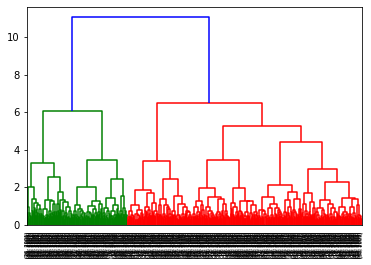

<Figure size 432x288 with 0 Axes>

In [56]:
# 3.2. Building the Dendrogram	
from scipy import cluster
clusters = cluster.hierarchy.linkage(iq_norm, method = 'ward')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
cluster.hierarchy.dendrogram(clusters, labels = df_iq.index)

# 3.2.1 Visualization
f = plt.figure()
plt.show()
#f.savefig( "test.png")
#files.download('test.png')


In [93]:
cut = 5
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([4, 4, 4, 1, 4, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 5, 4, 4, 1, 4, 4, 4, 5, 4, 5, 4, 4, 3, 3, 5, 5,
       4, 3, 4, 4, 1, 4, 1, 1, 1, 4, 1, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 5, 5, 5, 3, 3, 5, 5, 5, 3, 3, 3, 2, 5, 4, 4, 5, 4, 4, 5,
       5, 3, 5, 5, 4, 5, 3, 4, 5, 4, 4, 4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 5, 4, 3, 3, 5, 5, 5, 3, 5, 5, 5, 2, 3,
       4, 5, 2, 4, 4, 5, 5, 4, 4, 5, 5, 5, 5, 4, 3, 3, 5, 4, 4, 5, 4, 5,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 5, 5, 3, 3, 2, 3, 2,
       5, 3, 3, 5, 5, 4, 4, 5, 3, 2, 2, 2, 3, 5, 5, 5, 5, 3, 5, 5, 3, 5,
       5, 4, 5, 4, 5, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 1, 1, 1, 3, 5, 5,
       2, 5, 4, 3, 5, 5, 3, 3, 5, 5, 5, 3, 5, 3, 3, 5, 3, 3, 3, 5, 4, 5,
       5, 3, 5, 5, 5, 3, 3, 4, 4, 5, 4, 5, 4, 2, 2, 4, 5, 1, 4, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 5, 1, 2, 2, 2, 2, 3, 5, 3, 3, 3, 3, 3, 5, 5,
       5, 2, 5, 5, 4, 3, 4, 3, 5, 5, 3, 5, 5, 5, 5,

Calculo el coeficiente de silhouette, cuanto mas cerca de 1 indica que los agrupamientos son mejores

In [91]:
from sklearn import metrics
n_clusters_ = len(set(labels)) 
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(iq_norm, labels))

Estimated number of clusters: 2
Silhouette Coefficient: 0.238


Visualizo los grupos

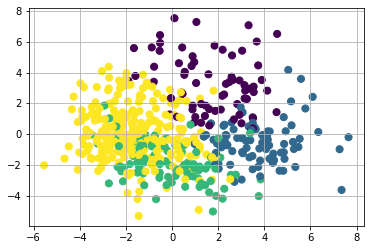

In [62]:
#plotting orginal points with color related to label
fig, ax = plt.subplots()
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)

plt.grid()
plt.show()

# K-Means

Para utilizar K-Means debemos especificar el número de grupos que queremos encontrar. A este número de grupos se le denomina K.

El algoritmo K-Means sigue los siguientes pasos:

-Inicialización: se elige la localización de los centroides de los K grupos aleatoriamente
-Asignación: se asigna cada dato al centroide más cercano
-Actualización: se actualiza la posición del centroide a la media aritmética de las posiciones de los datos asignados al grupo

In [48]:
# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

In [63]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

Según el método del codo el k óptimo es 4, donde el valor de la suma de las distancias se reduce

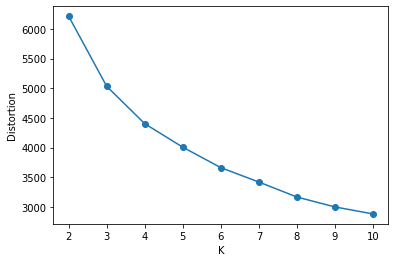

In [64]:
plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

Segun el índice de silhouette el numero optimo de k es 3, ya que es cuando es mayor, mas cerca de 1

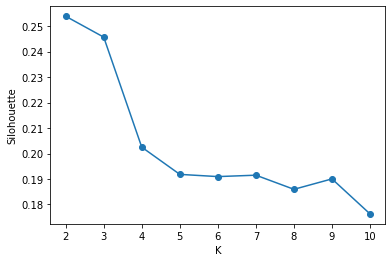

In [65]:
plt.plot(range(2,11), silhouettes , marker='o')
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.show()

Ejecución del algoritmo

In [99]:
k = 4

km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)

calculo de los valores finales de las métricas del algoritmo

In [100]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(iq_norm, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.159
Distortion: 4401.98


Datos etiquetados

In [101]:
km.labels_

array([1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 3, 3, 3, 2,
       2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 0, 0, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3,
       2, 3, 0, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 3, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 3, 3, 2, 2, 2, 2, 3, 0, 0, 0, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3,
       0, 3, 1, 3, 0, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 0, 3, 2, 2, 3, 2, 3, 0, 2, 3, 2, 2, 2, 2,

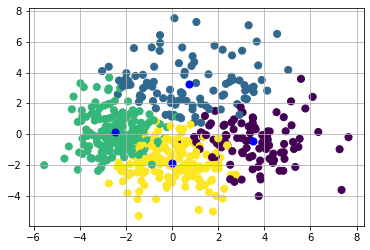

In [102]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=km.labels_,s=50)
# plotting centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='blue',s=50)
# 
plt.grid()
plt.show()

# Dbscan

Este algoritmo asume que los grupos están definidos en áreas de gran densidad de datos. Las zonas pocos densas separan los grupos

In [70]:
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(iq_norm)

Elegi como minPts 2 porque con 3 me daba 154 outliers y el dataframe es de 520 filas.

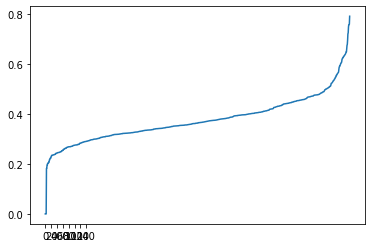

In [78]:
import numpy
minPts= 2
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(iq_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(iq_norm):
    for j in range(len(iq_norm)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0, 150, 20))
ax.set_yticks(numpy.arange(0, 3, 0.2))

plt.plot(seq)


plt.show()

Ejecuto el algoritmo, voy a probar realizar diferentes clusters desde 0,3 a 0,7 con intervalos de 0,1

In [79]:
from sklearn.cluster import DBSCAN

for eps in numpy.arange(0.20, 0.7, 0.10):
  db = DBSCAN(eps, min_samples=minPts).fit(iq_norm)
  core_samples_mask = numpy.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  print (eps, n_clusters_)
  
#labels

0.2 4
0.30000000000000004 33
0.4000000000000001 13
0.5000000000000001 3
0.6000000000000001 1


In [80]:
db = DBSCAN(eps=0.5, min_samples=minPts).fit(iq_norm)
labels = db.labels_
labels

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0, -1, -1,  0,  0,  0,
        0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0

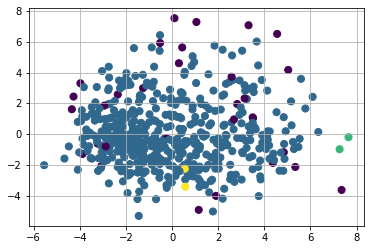

In [81]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
plt.grid()
plt.show()

Identifico outliers

In [85]:
df_iq['dbscan_group'] = labels

df_iq[df_iq['dbscan_group'] == -1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,dbscan_group
weekofyear,year,,,,,,,,,,,,,,,,,,,,,
29,2000,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,-1
38,2000,0.348814,0.295717,0.404843,0.242571,97.55,297.435714,298.514286,292.707143,310.2,288.3,3.20,77.487143,97.55,14.338571,11.314286,27.533333,12.566667,36.0,20.5,104.2,-1
39,2000,0.175686,0.099483,0.225714,0.182786,95.89,299.355714,300.885714,293.217143,310.8,290.0,2.60,71.462857,95.89,14.798571,14.942857,27.150000,12.175000,34.0,20.5,57.9,-1
46,2000,0.099933,0.035860,0.195486,0.064183,39.25,301.637143,302.614286,294.232857,311.8,294.2,3.60,67.185714,39.25,15.880000,13.371429,29.025000,13.100000,36.4,21.7,0.0,-1
47,2000,0.169983,0.289300,0.300983,0.170917,55.91,300.872857,301.914286,293.060000,311.1,293.6,11.20,66.042857,55.91,14.768571,13.142857,27.700000,11.350000,36.5,21.5,0.0,-1
5,2001,0.341500,0.260667,0.329386,0.369071,87.18,295.297143,296.100000,294.411429,302.2,292.2,80.95,95.407143,87.18,15.860000,5.142857,26.433333,9.666667,33.0,20.0,147.8,-1
24,2001,0.317083,0.298967,0.219871,0.217343,47.13,295.482857,296.435714,294.341429,302.6,291.9,95.06,94.017143,47.13,15.782857,7.271429,26.880000,10.680000,33.4,20.0,37.1,-1
26,2001,0.192300,0.275286,0.316457,0.325414,1.22,294.845714,296.000000,290.572857,306.1,288.4,1.82,79.322857,1.22,12.464286,12.342857,26.400000,10.050000,32.3,17.1,31.0,-1
41,2001,0.420286,0.381957,0.443800,0.546017,58.75,299.158571,300.285714,293.812857,312.3,290.8,12.30,74.418571,58.75,15.327143,11.342857,28.525000,12.475000,36.8,21.8,30.9,-1


Creo un nuevo dataframe sin outliers

In [88]:
df_sinout=df_iq[df_iq['dbscan_group'] != -1]

In [89]:
df_sinout.shape

(489, 21)

# Expectation maximization

In [83]:
from sklearn.mixture import GaussianMixture

lowest_bic = numpy.infty
bic = []
best_cv = 'full'
best_k = 3
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components_range = range(1, 7)
for cv_type in cv_types:
    for k in range(1, 7):
        gmm = GaussianMixture(n_components=k, covariance_type=cv_type, init_params='random')
        gmm.fit(X_pca)
        bic.append(gmm.bic(X_pca))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_cv = cv_type
            best_k = k
            
print ("Mejor valor K", best_k, "Mejor tipo de Covarianza", best_cv)

Mejor valor K 2 Mejor tipo de Covarianza diag


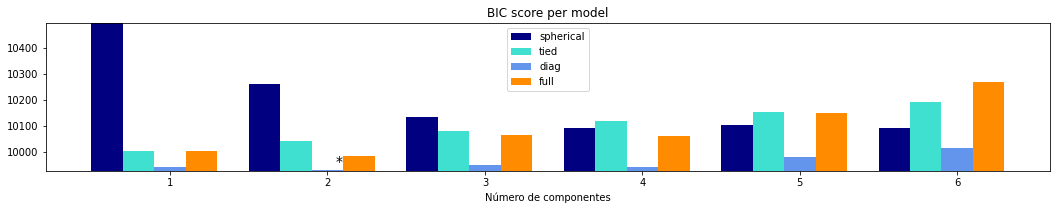

In [84]:
# Plot the BIC scores
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
bars = []
plt.figure(figsize=(18, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = numpy.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([min(bic) * 1.01 - .01 * max(bic), max(bic)])
plt.title('BIC score per model')
xpos = numpy.mod(numpy.argmin(bic), len(n_components_range)) + .65 +\
    .2 * numpy.floor(numpy.argmin(bic) / len(n_components_range))
plt.text(xpos, min(bic) * 0.97 + .03 * max(bic), '*', fontsize=14)
spl.set_xlabel('Número de componentes')
spl.legend([b[0] for b in bars], cv_types)